In [1]:
import pandas as pd

In [2]:
train=pd.read_csv(r"C:\Users\vinay\Desktop\titanic\train.csv")

In [3]:
test=pd.read_csv(r"C:\Users\vinay\Desktop\titanic\test.csv")

In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.331339  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.084153  0.114631   
Age             0.033207 -0.069809 -0.331339 -0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.091566  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex          0.245489  0.182333  
Age         -0.179191  0.091566  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

<AxesSubplot:>

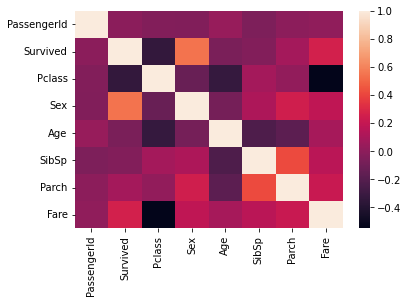

In [38]:
import seaborn as sns
print(train.corr())
sns.heatmap(train.corr())

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
def unique_cols(x):
    s=set()
    for i in train[x]:
        s.add(i)
    return s

print("Sex: ", unique_cols('Sex'))
print("Pclass: ",unique_cols('Pclass'))

Sex:  {'male', 'female'}
Pclass:  {1, 2, 3}


In [7]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [8]:
train.drop('Cabin', axis=1, inplace=True)

In [9]:
train.drop('Name', axis=1, inplace=True)

In [10]:
train.drop('Ticket', axis=1, inplace=True)

In [11]:
train.drop('Embarked', axis=1, inplace=True)

In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [13]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [14]:
train['Sex']=train['Sex'].map({'male':1, 'female':2})

In [37]:
unique_cols('Sex')

{1, 2}

In [16]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
data=train.drop('Survived', axis=1)
label=train['Survived']

In [19]:
x_tr, x_ts, y_tr, y_ts=train_test_split(data, label)

In [20]:
model=LogisticRegression().fit(data, label)

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
y_pr=model.predict(x_ts)

In [22]:
y_pr

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
score=accuracy_score(y_ts, y_pr)
score

0.7937219730941704

In [25]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test.drop('Cabin', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)
test.drop('Embarked', axis=1, inplace=True)

In [27]:
test['Age']=test['Age'].fillna(test['Age'].mean())

In [28]:
test.shape

(418, 7)

In [29]:
# test.dropna(axis=1, inplace=True)
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [30]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [31]:
test.shape

(418, 7)

In [32]:
test['Sex']=test['Sex'].map({'male':1, 'female':2})

In [33]:
pr_final=model.predict(test)

In [34]:
# data1=test['PassengerId']
# data2=pr_final

In [35]:
res=pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':pr_final})

In [39]:
res.to_csv("submission2.csv", index=False)